<a href="https://colab.research.google.com/github/vitroid/PythonTutorials/blob/master/Pending/AtomicOrbital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 水素原子の電子軌道

教科書(「大学生の一般化学」 https://www.amazon.co.jp/dp/4563046256/ )の2.5章には、Schrodinger方程式の厳密解法が説明されています。しかし、これらの式を解いて、電子軌道の方程式を導くのは大変なので、ここでは概要だけを書きます。

解くべき波動方程式は、一般にはこんな形をしています。

(1次元の場合: 2.17式)
$$\left(-{\hbar^2\over 2m}{d^2\over dx^2}+V(x)\right)\Psi(x)=E\Psi(x)$$

あれ? この式には時間$t$が含まれていませんね。波動方程式というのは、波の運動を表わす式なので、時間が含まれていないのはなぜでしょうか。

これは、一般的な波の満たすべき方程式ではなく、定在波の方程式です。定在波は、時間が経過しても同じ場所から動かず、振幅だけが時間変化するので、波の「形」と「高さ」を分離できます。高さは時間変化しますが、形は変わらない(節の場所はいつも節、腹の場所はいつも腹)ので、上の式は形に関する部分だけを抽出した形になっています。

$\Psi(x)$が波の形(波動関数)、$V(x)$はポテンシャルエネルギーです。

二次元の場合には、単純に$y$を書き加えるだけです。
$$\left[-{\hbar^2\over 2m}\left({\partial^2\over \partial x^2}+{\partial^2\over \partial y^2}\right)+V(x,y)\right]\Psi(x,y)=E\Psi(x,y)$$
円形の太鼓の膜の場合には、$xy$座標よりも、角度$\theta$と半径$r$を用いた極座標のほうが扱いやすいので、極座標で同じ式を表現すると、
$$\left[-{\hbar^2\over 2m}\left(\frac{\partial^2}{\partial r^2}+\frac {1}{r}\frac{\partial}{\partial r}+\frac{1}{r^2}\frac{\partial^2}{\partial \theta^2}\right)+V(r,\theta)\right]\Psi(r,\theta)=E\Psi(r,\theta)$$

円形の太鼓の膜の波動方程式の解き方はBの解説に書きました。(https://moodle.el.okayama-u.ac.jp/mod/resource/view.php?id=1010766 )定在波の形から想像できるように、膜の振動は、水面の波紋のように動径(半径)方向に波打つ振動と、ケーキやピザを切りわけるような、放射状の波(円周方向の波)の重ねあわせで表現できるので、実際に波の形を求める場合にも、変数分離という方法で、2つの種類の振動を別々に計算しました。

三次元の場合も、考え方はおなじです。
$$\left[-{\hbar^2\over 2m}\left({\partial^2\over \partial x^2}+{\partial^2\over \partial y^2}+{\partial^2\over \partial z^2}\right)+V(x,y,z)\right]\Psi(x,y,z)=E\Psi(x,y,z)$$
あるいは、三次元の極座標で表すなら、(2.46)式
$$\left[-{\hbar^2\over 2m}\left[{1\over r^2}{\partial\over \partial r}\left(r^2{\partial\over \partial r}\right)+{1\over r^2\sin\theta}{\partial\over \partial \theta}\left(\sin\theta{\partial\over\partial \theta}\right)+{1\over r^2\sin^2\theta}{\partial^2\over\partial\phi^2}\right]+V(r)\right]\Psi(r,\theta,\phi)=E\Psi(r,\theta,\phi)$$
となります。

電子軌道とは、原子核の周囲にとらえられた電子が作る定在波の形のことです。電子を核の近くにとらえるCoulomb力の効果は、上の式ではポテンシャル関数$V(r)=-{q^2\over 4\pi\epsilon_0 r}$で表現されます。そして、電子軌道の場合も、太鼓の膜の振動と同様、動径方向の振動と、球面上の振動の2種類に分離できます。
$$\Psi(r,\theta,\phi)=R(r)Y(\theta,\phi)$$
$R(r)$が動径方向の波の形をあらわす式、$Y(\theta,\phi)$が球面上の振動を表す式です。これを三次元の極座標の方程式(2.46)に入れてやると、(もう書き写すのが大変なので式番号で示します)
$R(r, n, l)$は式(2.55)となり、$Y$は球面調和関数$Y_l^m(\theta, \phi)$が得られます。

$R$の式のなかに現れる$(n,l)$ (ただし$0\le l\lt n$)は量子数と呼ばれる整数で、この番号が違うと波の形がちがってきますが、いずれの数字を選んでも波動方程式を満足します。

以下では、$R$を実際にいくつかプロットしてみます。


Text(0.5, 0, '$r / a_0$')

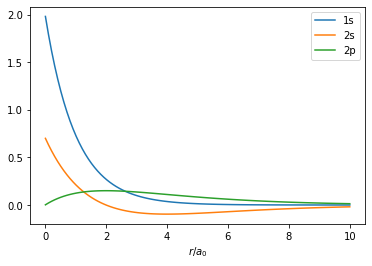

In [12]:
import numpy as np
from scipy.special import sph_harm, genlaguerre
import math
import matplotlib.pyplot as plt

def R(r, n, l):
    """
    水素の原子軌道の動径成分
    r: 半径 (Bohr半径を1とする)
    n: 主量子数
    l: 方位量子数
    """
    rho = 2.*r/n
    l_poly = genlaguerre(n-l-1,2*l+1)(rho)
    prefactor = np.sqrt((2./n)**3*math.factorial(n-l-1)/(2.*n*math.factorial(n+l)))
    return prefactor*np.exp(-rho/2.)*rho**l*l_poly

r = np.linspace(0.01, 10, 100)
# 1s orbital
n = 1
l = 0
plt.plot(r, R(r, n, l), label="1s")
# 2s orbital
n = 2
l = 0
plt.plot(r, R(r, n, l), label="2s")
# 2p orbital
n = 2
l = 1
plt.plot(r, R(r, n, l), label="2p")

plt.legend()
plt.xlabel(r"$r / a_0$")

電子の波動関数自体は測定できませんが、波動関数の二乗が電子の存在確率に比例すると解釈されます。そこで、半径に対し、電子の存在確率をプロットします。(教科書 図3.4)波動関数は複素関数なので、波動関数の二乗は、波動関数の実部の二乗と虚部の二乗の和で計算します。

Text(0.5, 0, '$r / a_0$')

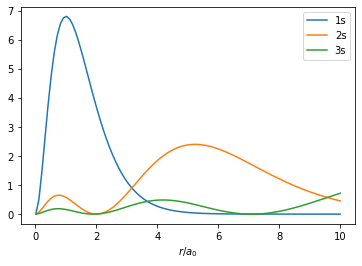

In [29]:
r = np.linspace(0.01, 10, 100)
# 1s orbital
n = 1
l = 0
Rr = R(r, n, l)
plt.plot(r, 4*np.pi*r**2*(Rr.real**2+Rr.imag**2), label="1s")
# 2s orbital
n = 2
l = 0
Rr = R(r, n, l)
plt.plot(r, 4*np.pi*r**2*(Rr.real**2+Rr.imag**2), label="2s")
# 3s orbital
n = 3
l = 0
Rr = R(r, n, l)
plt.plot(r, 4*np.pi*r**2*(Rr.real**2+Rr.imag**2), label="3s")

plt.legend()
plt.xlabel(r"$r / a_0$")

講義の中で、一次元の現実の弦の振動は、たくさんの基本振動(正弦波)の足しあわせで表現できる、と説明しました。この正弦波の二次元バージョンが球面調和関数です。つまり、球面上に生じる波は、たくさんの基本振動(=球面調和関数)の足しあわせで表現できます。

球面調和関数$Y_n^m(\theta, \phi)$は、極座標の緯度と経度をあらわす2つの角度の関数で、その値は下の図のようになります。
![SphericalHarmonics](https://ambisonics.iem.at/xchange/sharmonics_symmetries.gif)
赤と青が、関数の値の正負を表しています。

原子軌道=電子の波動関数はこれらの2つの関数のかけ算で表せます。



In [34]:
import math
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
import scipy.special
from scipy.special import sph_harm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import ListedColormap
import skimage
from skimage import measure

import plotly.graph_objects as go


def hydrogen_wf(n,l,m,X,Y,Z):
    """
    水素の原子軌道(電子の波動関数)
    X, Y, Z: 空間座標
    n: 主量子数
    l: 方位量子数
    m: 磁気量子数
    """
    # 直交座標から極座標に変換
    r = np.sqrt(X**2+Y**2+Z**2)
    Theta = np.arccos(Z/r)
    Phi = np.arctan2(Y,X)
    
    # 波動関数は動径関数と球面関数の積
    wf = R(r, n, l) * sph_harm(m, l, Phi, Theta)
    # 特異点を回避する
    wf = np.nan_to_num(wf)
    return wf

dz=0.5
zmin=-10
zmax=10
x = np.arange(zmin,zmax,dz)
y = np.arange(zmin,zmax,dz)
z = np.arange(zmin,zmax,dz)
X,Y,Z = np.meshgrid(x,y,z)
n=2   #(n,l,m)=(2,1,0): 2p orbital
l=1
m=0
wave = hydrogen_wf(n,l,m,X,Y,Z)
# 二乗して存在確率に換算
density = abs(wave)**2

fig = go.Figure(data=go.Isosurface(
    x=X.flatten(),
    y=Y.flatten(),
    z=Z.flatten(),
    value=density.flatten(),
    opacity=0.6,
    surface_count=10,
    # isomin=-0.,
    # isomax=+0.05,
    caps=dict(x_show=False, y_show=False, z_show=False)
    ))
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning:

invalid value encountered in true_divide

